In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics as sts

import warnings
warnings.filterwarnings('ignore')



In [373]:
#laoding dataset
df=pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [374]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [375]:
#give information about that there is null value availabe or not

df.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [376]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [377]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

In [378]:
df.duplicated().sum()

0

In [379]:
df.shape

(21613, 21)

In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [381]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [382]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [383]:
# the following are the step involement to build model
# 1.data cleaning
# 2.EDA
# 3.Text preprocessing
# 4.model building
# 5.evaluation
# 6.improvement

# 1.data cleaning


In [384]:
#there is no any relation between the id and price
df=df.drop(["id"],axis=1)


In [385]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [386]:
#there is no any relation between the id and price
# df=df.drop(["date"],axis=1)


In [387]:

#also there is no any relation between the data and price of house
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


In [388]:
df.shape

(21613, 20)

#numerical value


In [389]:
target_df=df["price"]
target_df

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [390]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [391]:
print(df["date"])


0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object


In [392]:
def val_change(val):
    suitable_val=val[:4]
    return suitable_val


In [393]:
df["date"]=df["date"].apply(val_change)

In [394]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [395]:
df["date"]=df["date"].astype(int)

In [396]:
df["yr_renovated"]=np.where(df["yr_renovated"]==0,df["yr_built"],df["yr_renovated"])


In [397]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1955,98178,47.5112,-122.257,1340,5650
1,2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,1933,98028,47.7379,-122.233,2720,8062
3,2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1965,98136,47.5208,-122.393,1360,5000
4,2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1987,98074,47.6168,-122.045,1800,7503


In [398]:
df["Num_of_yr_build"]=df["date"]-df["yr_built"]
df["Num_of_yr_renovated"]=df["date"]-df["yr_renovated"]

In [399]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Num_of_yr_build,Num_of_yr_renovated
0,2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,1955,98178,47.5112,-122.257,1340,5650,59,59
1,2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,63,23
2,2015,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,1933,98028,47.7379,-122.233,2720,8062,82,82
3,2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,1965,98136,47.5208,-122.393,1360,5000,49,49
4,2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,1987,98074,47.6168,-122.045,1800,7503,28,28


In [400]:
df=df.drop(["date","yr_built","yr_renovated"],axis=1)

In [401]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,Num_of_yr_build,Num_of_yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,59,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,63,23
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,82,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,49,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,28,28


In [402]:
df["bathrooms"]=df['bathrooms'].astype(int)

In [403]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,Num_of_yr_build,Num_of_yr_renovated
0,221900.0,3,1,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,59,59
1,538000.0,3,2,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,63,23
2,180000.0,2,1,770,10000,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,82,82
3,604000.0,4,3,1960,5000,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,49,49
4,510000.0,3,2,1680,8080,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,28,28


In [404]:
df["floors"]=df["floors"].astype(int)
# df["price"]=df["price"].astype(int)

In [405]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,Num_of_yr_build,Num_of_yr_renovated
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,59,59
1,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,63,23
2,180000.0,2,1,770,10000,1,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,82,82
3,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,49,49
4,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,28,28


In [406]:
df["price"].corr(df["Num_of_yr_renovated"])

-0.10567167745722386

In [407]:
df["price"].unique

<bound method Series.unique of 0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64>

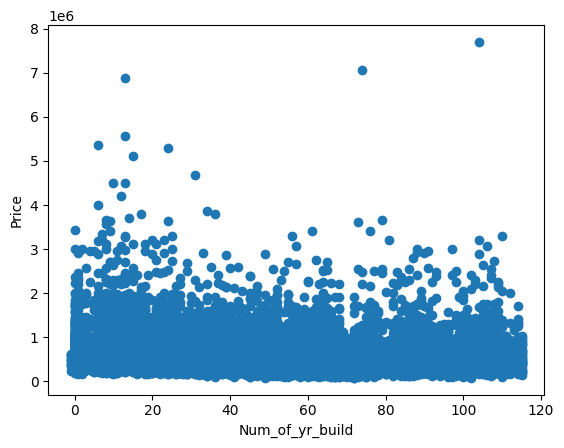

In [408]:
plt.scatter(x=df["Num_of_yr_build"],y=df["price"])
plt.xlabel("Num_of_yr_build")
plt.ylabel("Price")
plt.show()


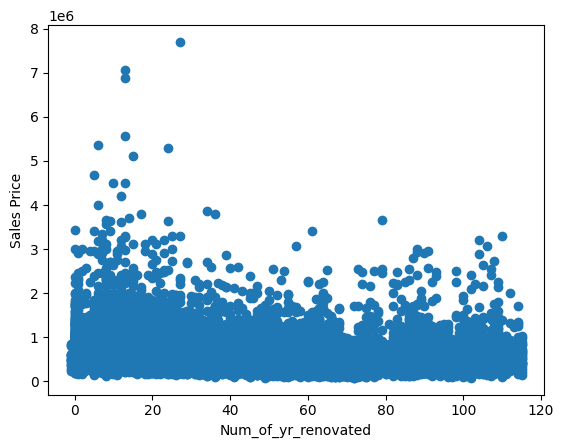

In [409]:
#getting the relationshi betwwen price and Num_of_yr_renovated
plt.scatter(x=df["Num_of_yr_renovated"],y=df["price"])
plt.xlabel("Num_of_yr_renovated")
plt.ylabel("Sales Price")
plt.show()


In [410]:
len(df["price"].unique()) #PRICE IS CONTINUOUS
len(df["Num_of_yr_renovated"].unique()) #PRICE IS CONTINUOUS

117

In [411]:
# features_numerical=[features for features in df.columns if df[features].dtypes!='o']
# print(len(features_numerical)) #it give the numerical featuresm




In [412]:
numerical_feature=df.columns.tolist()


In [413]:
for data in numerical_feature:
    print(len(df[data].unique()))

4028
13
9
1038
9782
3
2
5
5
12
946
306
70
5034
752
777
8689
117
117


In [414]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables
discrete_variable=[feature for feature in numerical_feature if len(df[feature].unique())<=25]

In [415]:
discrete_variable_df=pd.DataFrame(df[discrete_variable])
discrete_variable_df.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade
0,3,1,1,0,0,3,7
1,3,2,2,0,0,3,7
2,2,1,1,0,0,3,6
3,4,3,1,0,0,5,7
4,3,2,1,0,0,3,8


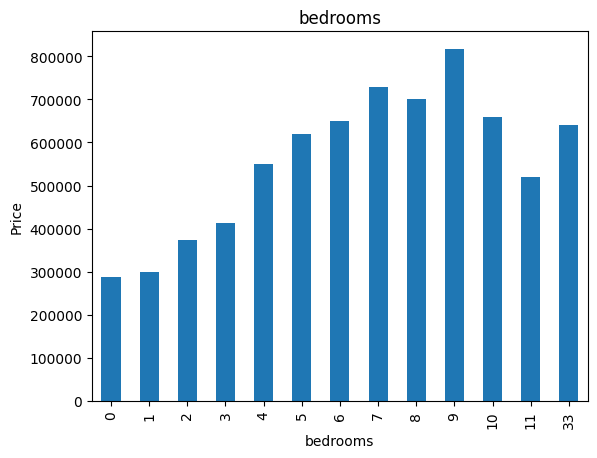

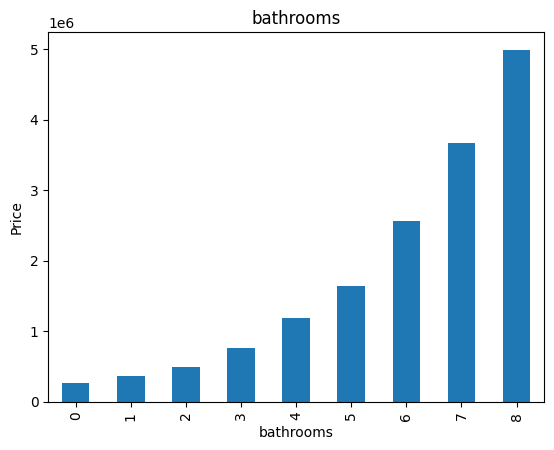

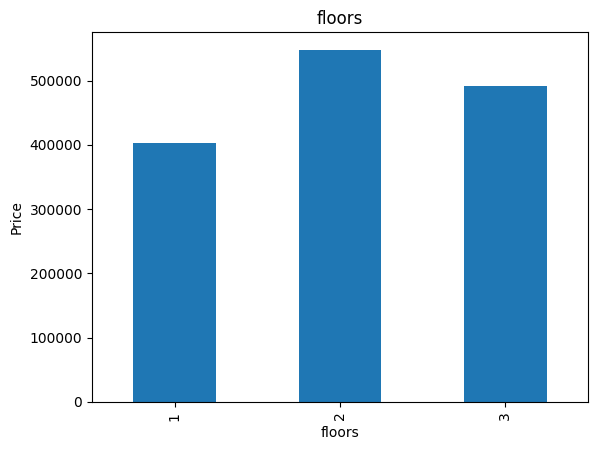

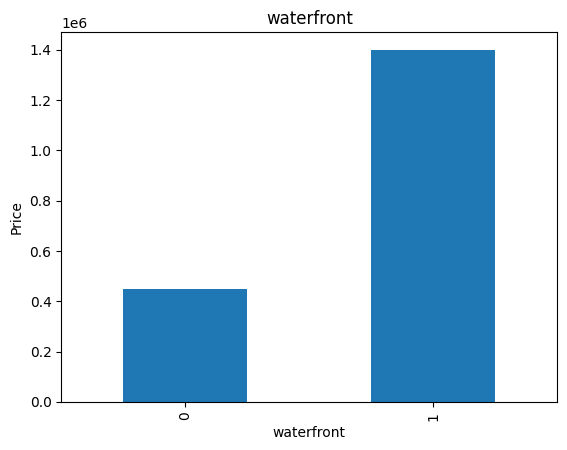

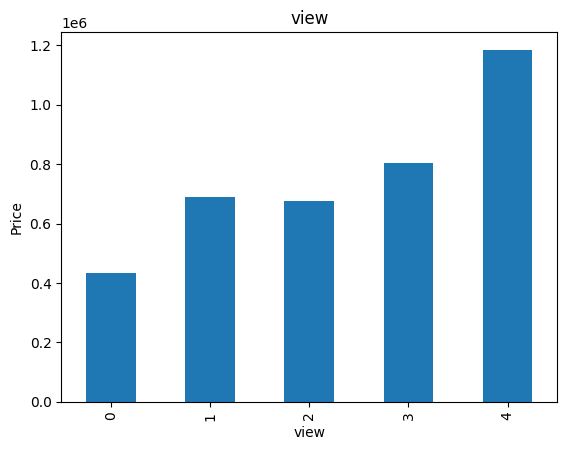

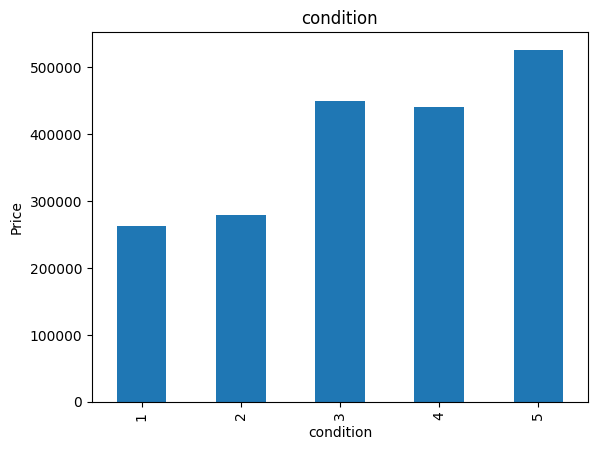

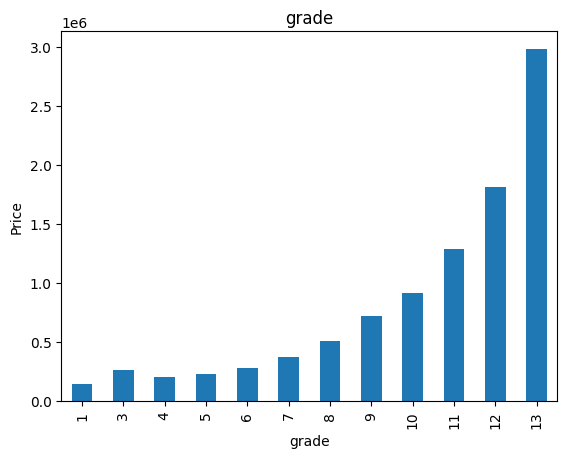

In [416]:
## Lets Find the realtionship between them and PRice

for feature in discrete_variable:
    data=df.copy()
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

In [417]:
## There is a relationship between variable number and SalePrice


In [418]:
continuous_variable=[feature for feature in numerical_feature if feature not in discrete_variable ]

In [419]:
continuous_variable_df=pd.DataFrame(df[continuous_variable])
continuous_variable_df.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,Num_of_yr_build,Num_of_yr_renovated
0,221900.0,1180,5650,1180,0,98178,47.5112,-122.257,1340,5650,59,59
1,538000.0,2570,7242,2170,400,98125,47.7210,-122.319,1690,7639,63,23
2,180000.0,770,10000,770,0,98028,47.7379,-122.233,2720,8062,82,82
3,604000.0,1960,5000,1050,910,98136,47.5208,-122.393,1360,5000,49,49
4,510000.0,1680,8080,1680,0,98074,47.6168,-122.045,1800,7503,28,28


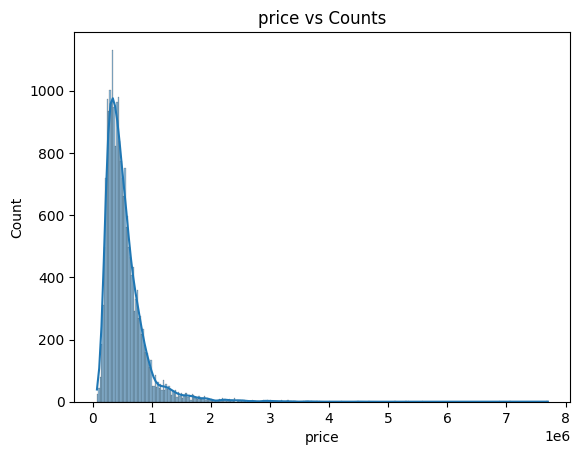

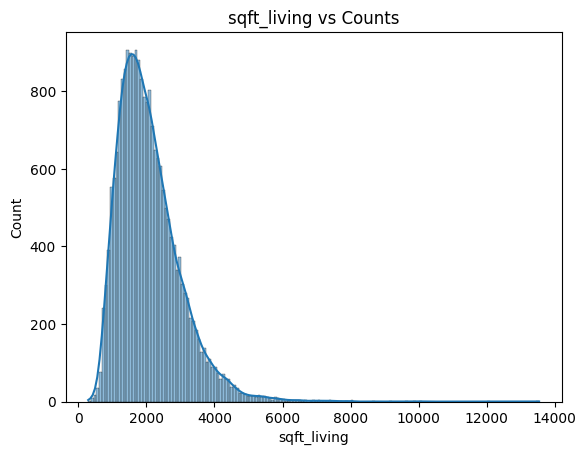

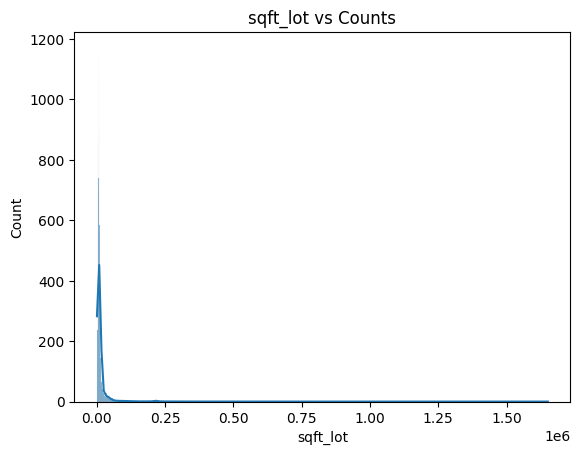

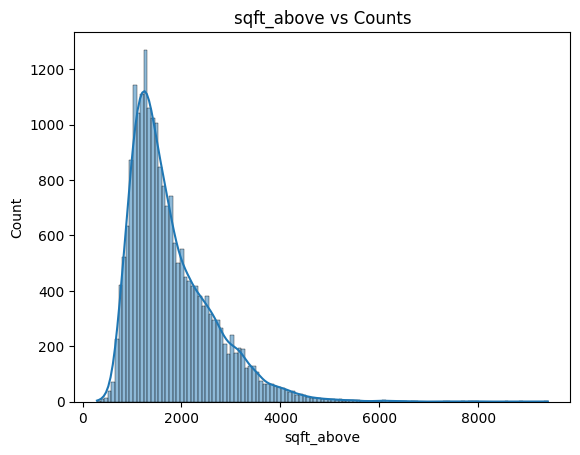

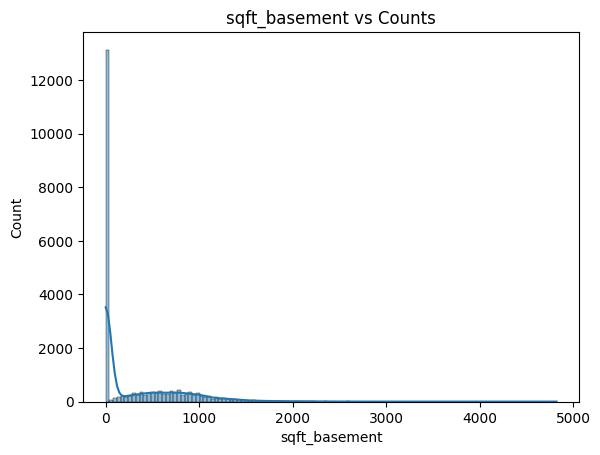

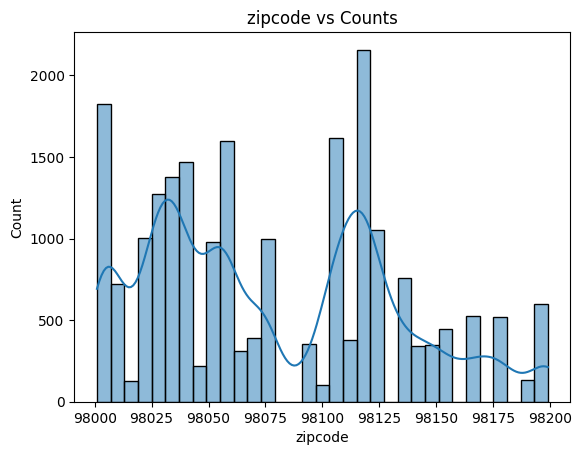

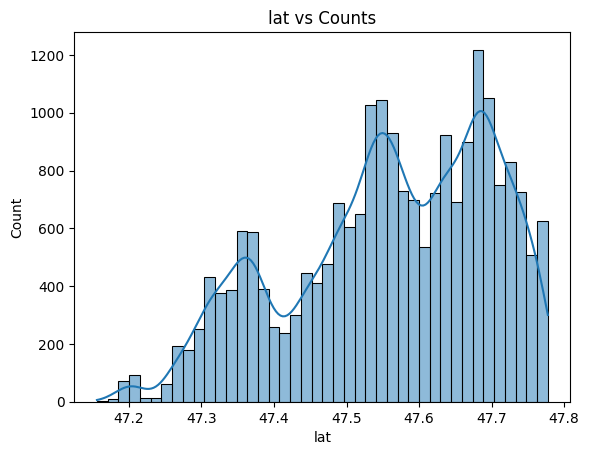

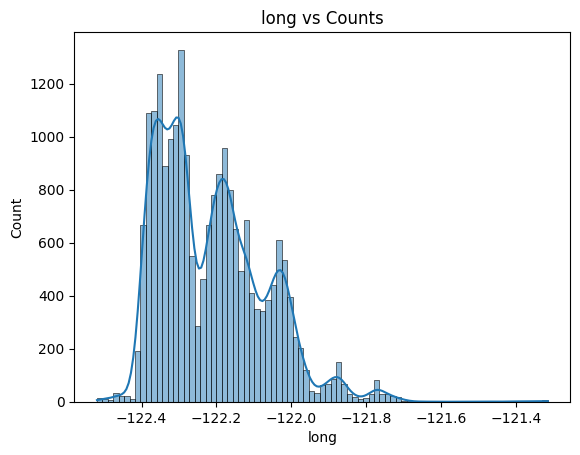

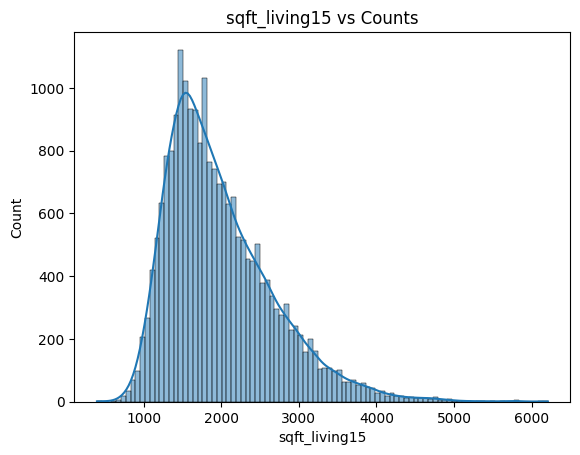

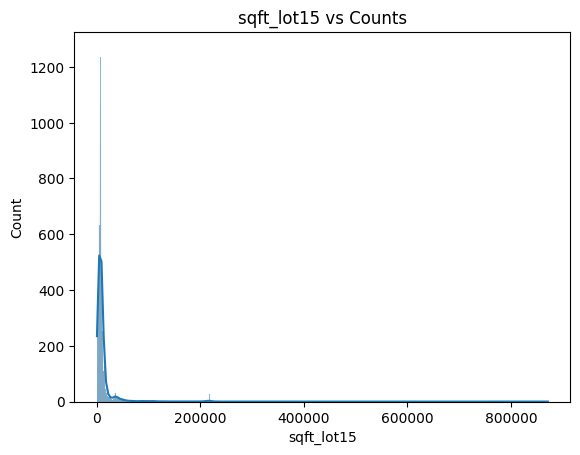

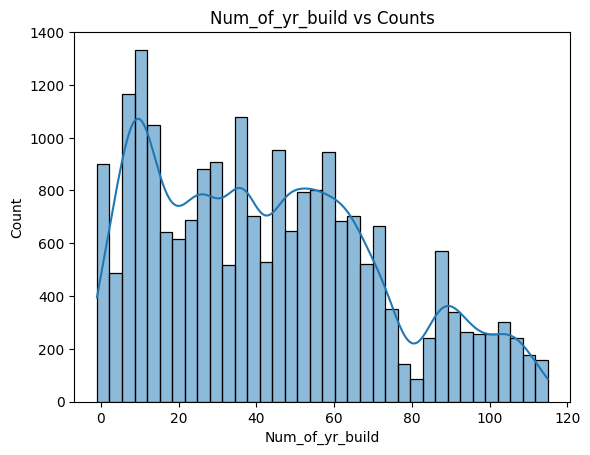

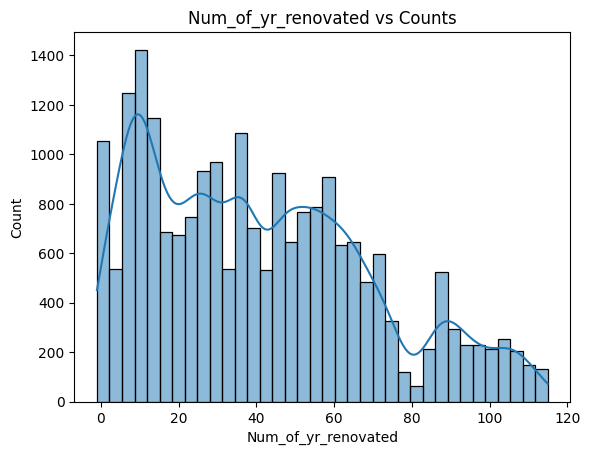

In [420]:
## Lets analyse the continuous values by creating histograms to understand the distribution
for feature in continuous_variable:
        data=df.copy()
#         data[feature].hist(bins=25)
        sns.histplot( data[feature],kde=True)
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(f'{feature} vs Counts')
        plt.show()

#     mean=df[feature].mean()
#     std=math.sqrt(sts.pvariance(df[feature]))

#     num_data=df[feature].shape
#     normal_sepal_length=np.random.normal(mean,std,num_data)
#     sns.histplot(normal_sepal_length,kde=True)

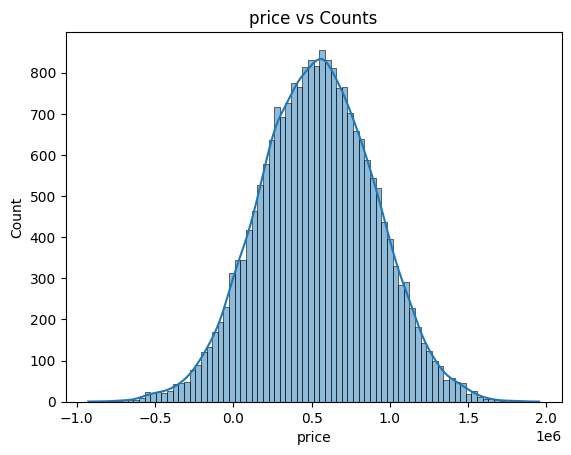

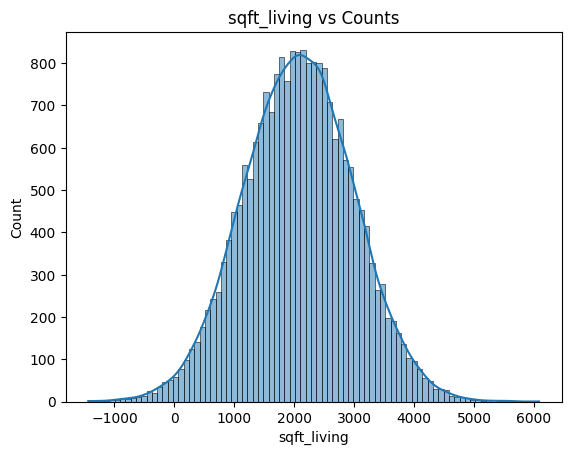

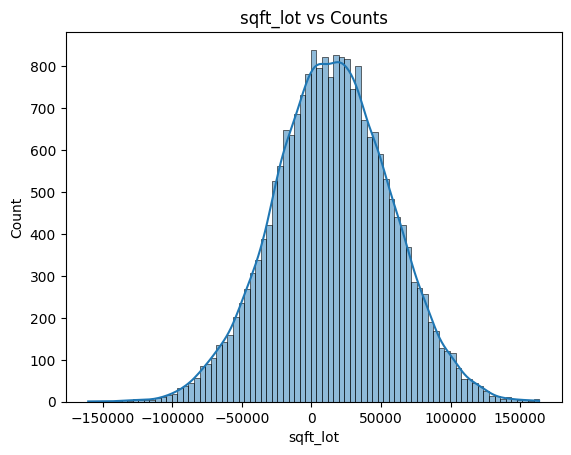

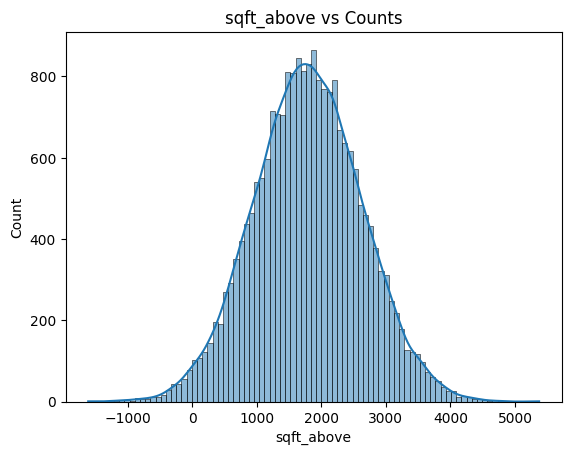

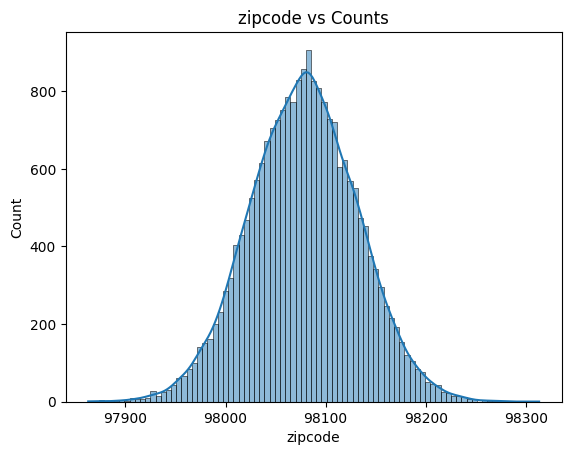

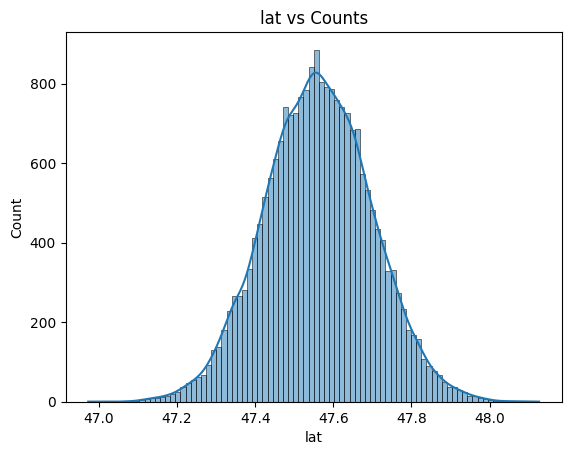

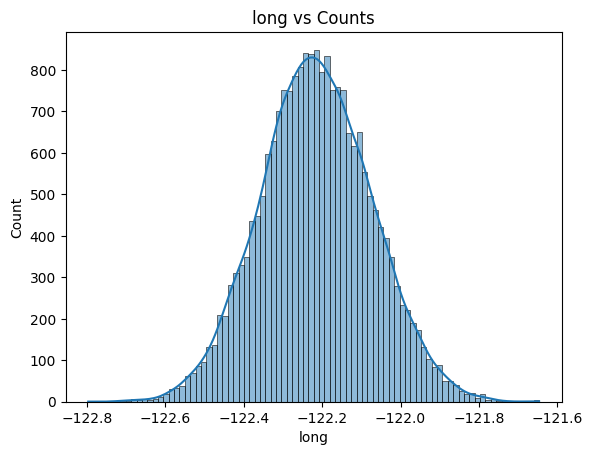

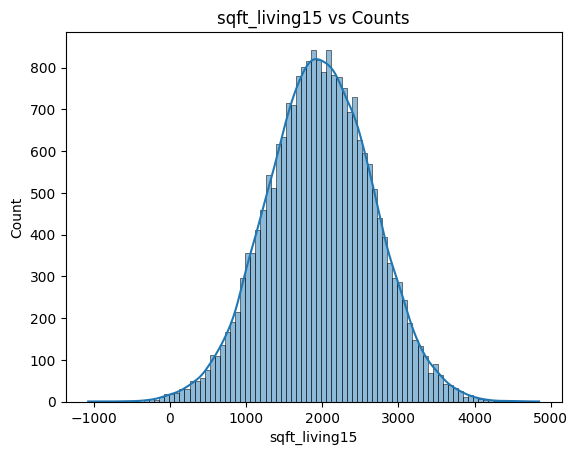

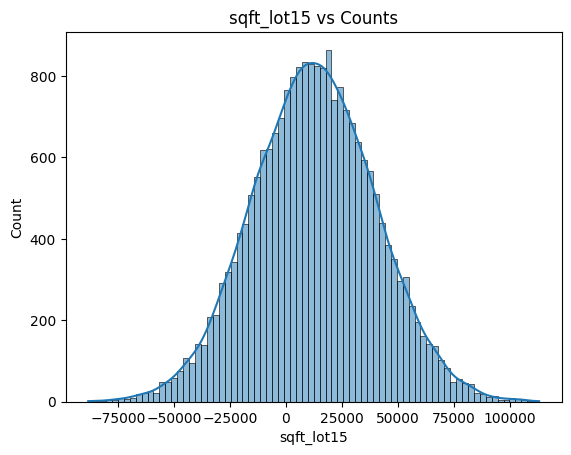

In [421]:
# Exploratory Data Analysis Part 2
#changin into normal distribution
for feature in continuous_variable:
    mean=std=num_data=norm_val=0    
    data=df.copy()

    if 0 in df[feature].unique():
        pass 
    else:
        mean=df[feature].mean()
#         df[feature]=np.log(df[feature])
        std=math.sqrt(sts.pvariance(df[feature]))
        num_data=df[feature].shape
        normal_val=np.random.normal(mean,std,num_data)

        sns.histplot( normal_val,kde=True)
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(f'{feature} vs Counts')
        plt.show()


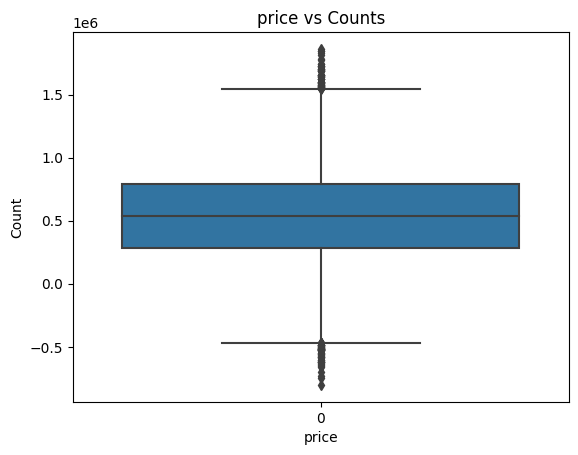

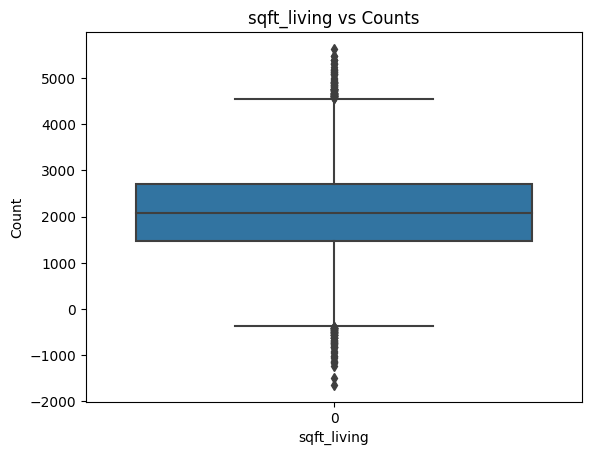

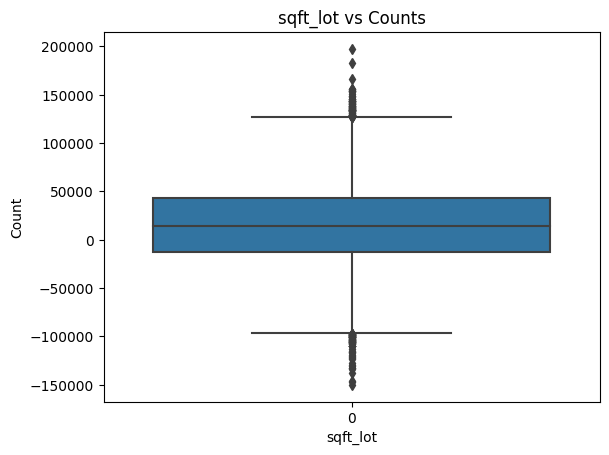

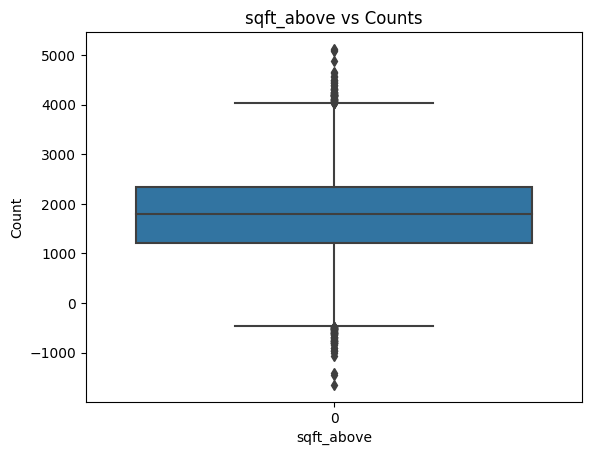

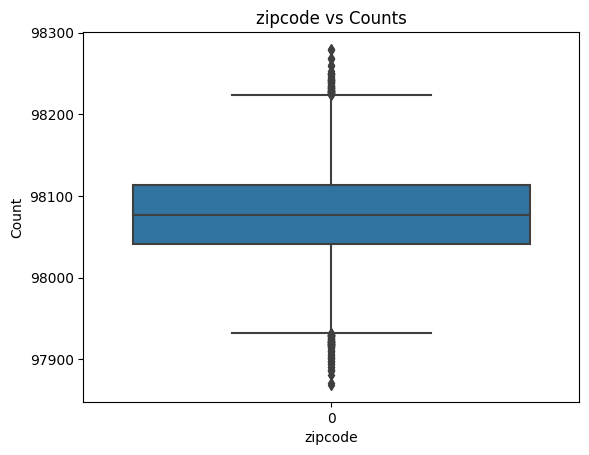

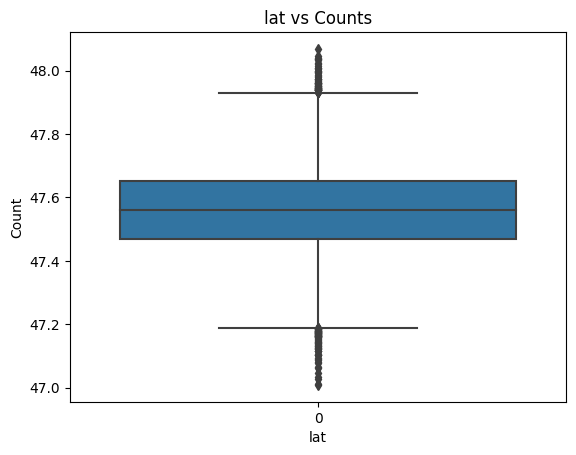

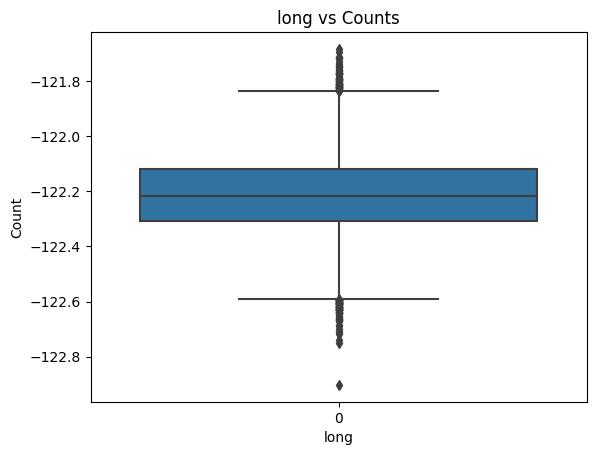

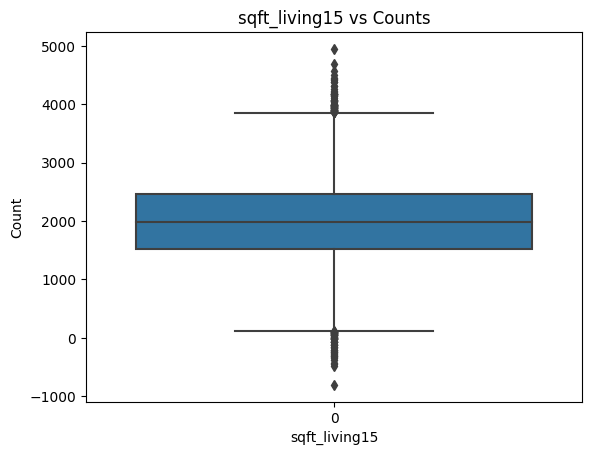

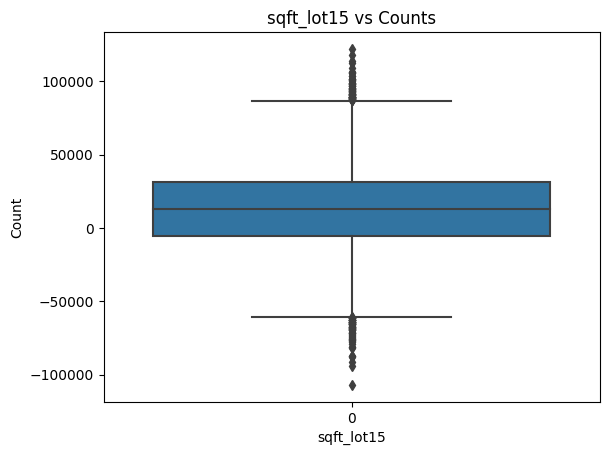

In [422]:
#finding the outlier
for feature in continuous_variable:
    mean=std=num_data=norm_val=0    
    data=df.copy()

    if 0 in df[feature].unique():
        pass 
    else:
        mean=df[feature].mean()
#         df[feature]=np.log(df[feature])
        std=math.sqrt(sts.pvariance(df[feature]))
        num_data=df[feature].shape
        normal_val=np.random.normal(mean,std,num_data)
        df[feature]=normal_val

        sns.boxplot( normal_val)
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(f'{feature} vs Counts')
        plt.show()


In [423]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,Num_of_yr_build,Num_of_yr_renovated
0,844905.540180,3,1,1900.798741,19956.756843,1,0,0,3,7,1671.989324,0,98123.471305,47.460676,-122.239472,2080.800183,36952.709985,59,59
1,-48875.896831,3,2,1776.523577,-2386.396969,2,0,0,3,7,2797.783417,400,98170.074668,47.610532,-121.792569,2392.582437,-50633.529890,63,23
2,589761.091567,2,1,3505.990685,2037.451074,1,0,0,3,6,739.466325,0,98061.854836,47.611731,-122.158790,2854.493974,20786.970778,82,82
3,335670.335239,4,3,2626.395511,1417.242704,1,0,0,5,7,2689.908516,910,98108.228648,47.476196,-122.334225,2928.063263,7271.422677,49,49
4,611922.149678,3,2,1679.589980,-43542.657340,1,0,0,3,8,1514.026315,0,98110.439670,47.549279,-121.886719,2646.984800,19692.247386,28,28
